Simple undirected, unweighted graph in Python

In [53]:
import matplotlib.pyplot as plt
import random

class Graph:
    def __init__(self, num_nodes=10):
        self.adj_list = []
        self.edge_weight = []
        self.num_nodes = num_nodes
        for i in range(self.num_nodes):
            self.adj_list.append([])
            self.edge_weight.append([])

    def add(self, node_from, node_to, weight):
        assert(node_from < self.num_nodes)
        assert(node_to < self.num_nodes)
        self.adj_list[node_from].append(node_to)
        self.edge_weight[node_from].append(weight)

    def get_deg(self, node):
        return len(self.adj_list[node])

    def print(self):
        for i in range(self.num_nodes):
            if len(self.adj_list[i]) == 0: continue
            print('\nOut Deg(' + str(i) + ') = ' + str(self.get_deg(i)))
            count = 0
            for node_to in self.adj_list[i]:
                print(str(i) + ' -> ' + str(node_to) + ", weight " + str(self.edge_weight[i][count]))
                count += 1  

    def drawGraph(self):
        plt.title("A Simple UnDirected Graph")
        plt.xlim(-80,1280)
        plt.ylim(-20,1200)  
        y = self.get_rand(-15, 1200)
        amp = 120
        for i in range(self.num_nodes):
            plt.plot([i*amp], [y[i]], marker="o", markersize=20)
            plt.text(i*amp, y[i], str(i))
            count = 0
            for node in self.adj_list[i]:
                x_values = [i*amp, node*amp]
                y_values = [y[i], y[node]]  
                x_text = (x_values[1] + x_values[0]) / 2
                y_text = (y_values[1] + y_values[0]) / 2
                plt.plot(x_values, y_values, linestyle="--")
                plt.text(x_text, y_text, self.edge_weight[i][count])
                count += 1
        plt.show()     
    
    def get_rand(self, start, end):
        edges = []
        for i in range(self.num_nodes):
            edges.append(random.randint(start, end))
        return edges    
    
    def check_nodes(self, node_one, node_two, used_nodes):
        ret = False
        if node_one == node_two: ret = True
        if (node_one, node_two) in used_nodes: ret = True
        if (node_two, node_one) in used_nodes: ret = True

    def test():
        g = Graph()
        nodes_from = g.get_rand(0, g.num_nodes-1)
        nodes_to = g.get_rand(0, g.num_nodes-1)
        weights = g.get_rand(10, 100)
        used_nodes = []
        for i in range(g.num_nodes):
            if nodes_from[i] == nodes_to[i]: continue
            if (nodes_from[i], nodes_to[i]) in used_nodes: continue
            if (nodes_to[i], nodes_from[i]) in used_nodes: continue
            g.add(nodes_from[i], nodes_to[i], weights[i])
            used_nodes.append((nodes_from[i], nodes_to[i]))

        print('Nodes From' + str(nodes_from))
        print('Nodes To' + str(nodes_to))    
        print('Weights' + str(weights))    
        g.print()    
        g.drawGraph()

Sample driver code

Nodes From[0, 2, 7, 5, 0, 5, 4, 6, 4, 5]
Nodes To[1, 6, 7, 9, 5, 6, 2, 5, 5, 9]
Weights[18, 40, 76, 50, 91, 24, 88, 17, 81, 54]

Out Deg(0) = 2
0 -> 1, weight 18
0 -> 5, weight 91

Out Deg(2) = 1
2 -> 6, weight 40

Out Deg(4) = 2
4 -> 2, weight 88
4 -> 5, weight 81

Out Deg(5) = 2
5 -> 9, weight 50
5 -> 6, weight 24

Out Deg(6) = 1
6 -> 5, weight 17


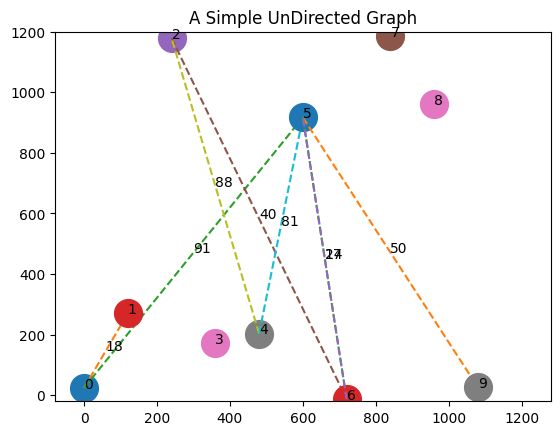

In [54]:
Graph.test()